# Land cover classification using the RandomForest algorithm
Niko Kolaxidis  
University Heidelberg  
12.07.2023

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

import os
from PIL import Image
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory containing the image files
directory = "../data/"

# Define the target size for image resizing
target_size = (256, 256)

# Initialize empty lists to store images and labels
images = []
labels = []

In [24]:
# Iterate over each folder in the directory
for folder_name in os.listdir(directory):
    folder_path = os.path.join(directory, folder_name)
    
    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Open the image file
        image = Image.open(file_path)
        
        # Resize the image to the target size
        image = image.resize(target_size)
        
        # Convert the image to a numpy array
        image_array = np.array(image)
        
        # Add the image array to the list of images
        images.append(image_array)
        
        # Add the folder name as a label
        labels.append(folder_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes of the image array and label array
print("Image array shape:", images.shape)
print("Label array shape:", labels.shape)

Image array shape: (2100, 256, 256, 3)
Label array shape: (2100,)


In [25]:
# Random state as square root of total number of features (i.e. images)
rs = int(round(sqrt(images.shape[0]), 0))

# Flatten the image data for model training
num_samples, height, width, bands = images.shape
X = images.reshape(num_samples, height * width * bands)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=rs)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=rs)
rfc.fit(X_train, y_train)

# Evaluate the classifier
y_pred = rfc.predict(X_test)

In [26]:
# Calculate overall accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

# Print the classifier metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.3976190476190476
Precision: 0.4001327485235505
Recall: 0.3976190476190476


In [27]:
# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

cr = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(cr).transpose()
df.to_csv("../classification_report.csv")

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.36      0.80      0.49        20
         airplane       0.46      0.26      0.33        23
  baseballdiamond       0.45      0.42      0.43        24
            beach       0.50      0.95      0.65        19
        buildings       0.33      0.44      0.38        18
        chaparral       0.70      0.75      0.72        28
 denseresidential       0.42      0.23      0.29        22
           forest       0.40      0.62      0.48        13
          freeway       0.19      0.20      0.19        15
       golfcourse       0.29      0.56      0.38        18
           harbor       0.74      0.81      0.77        21
     intersection       0.30      0.38      0.33        16
mediumresidential       0.10      0.05      0.07        20
   mobilehomepark       0.56      0.23      0.32        22
         overpass       0.10      0.06      0.08        16
       parkinglot       0.50    

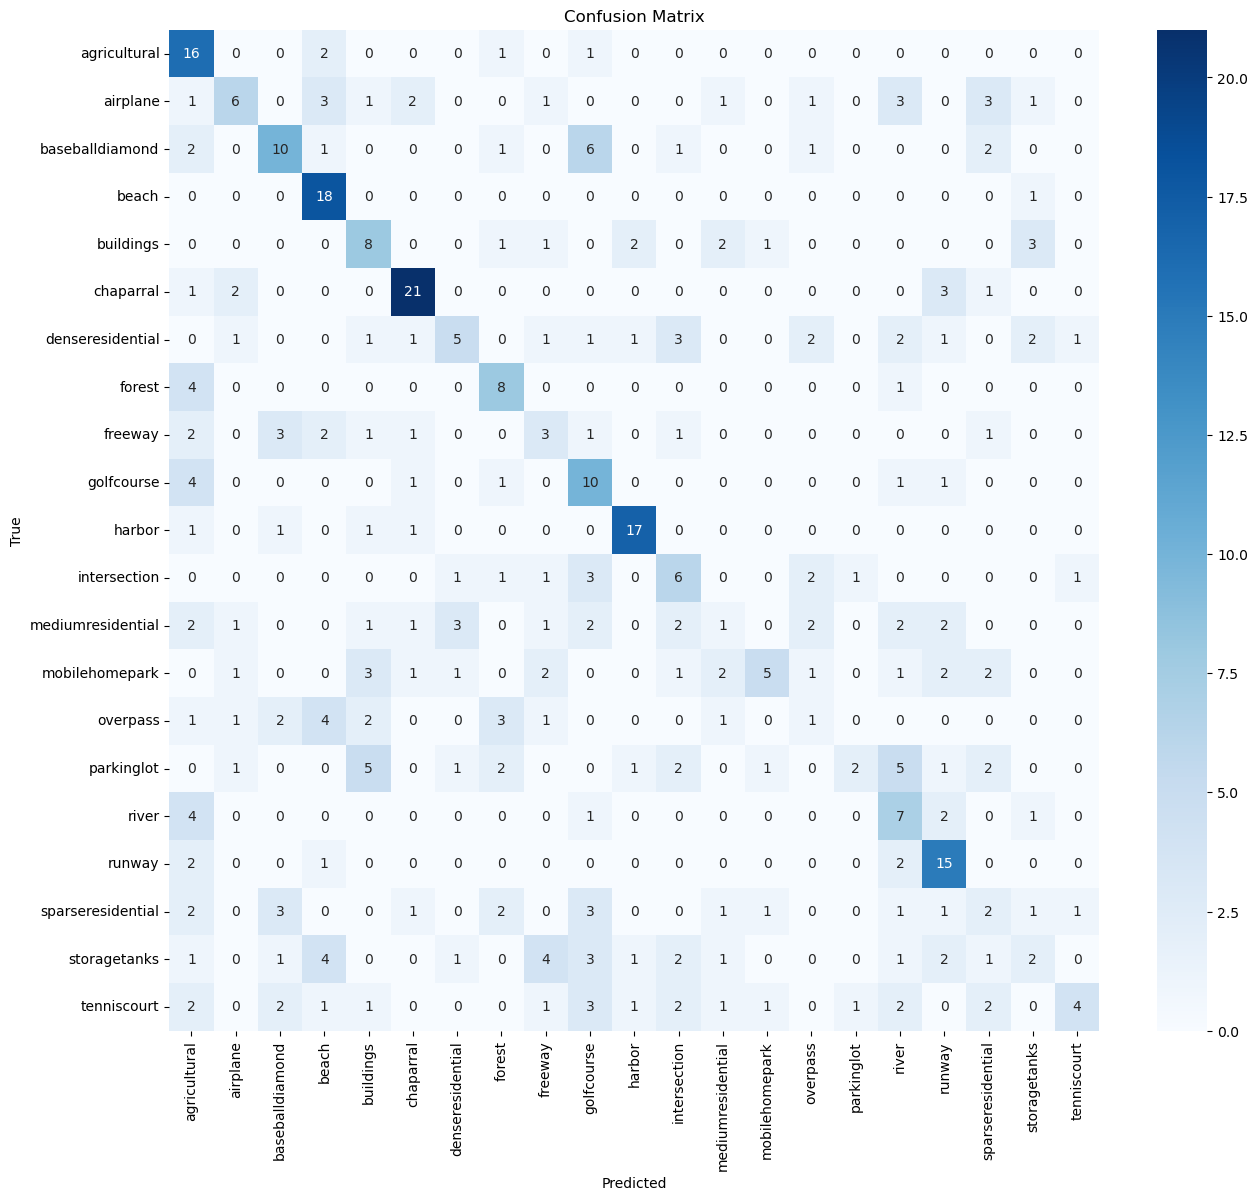

In [34]:
# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = np.unique(labels)
plt.figure(figsize=(15, 13))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()